# Seyed Mohammad Amin Atyabi - 830402014

# Linear Separability

**1**

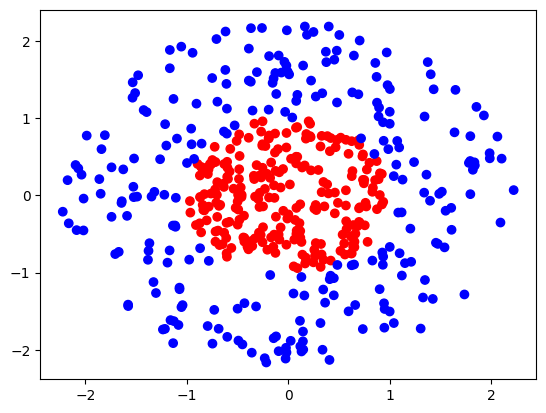

In [166]:
import numpy
from matplotlib import pyplot as plt


def random_point(radius, radius_start):
    alpha = 2 * numpy.pi * numpy.random.random()
    r = radius * numpy.sqrt(numpy.random.random() + (radius_start / 4))
    x = r * numpy.cos(alpha)
    y = r * numpy.sin(alpha)
    return x, y


color = {'r': 0.0, 'b': 1.0}

point_count = 250
X = []
Y = []
Z = []
for i in range(point_count):
    x, y = random_point(1, 0)
    X.append(x)
    Y.append(y)
    Z.append('r')

for i in range(point_count):
    x, y = random_point(2, 1)
    X.append(x)
    Y.append(y)
    Z.append('b')

data = numpy.array([X, Y])
Z = numpy.array(Z)

plt.scatter(data[0], data[1], color=Z)
plt.show()

**2**

Theta: [0.06097466 0.1277191  0.09565941]
Accuracy: 0.442


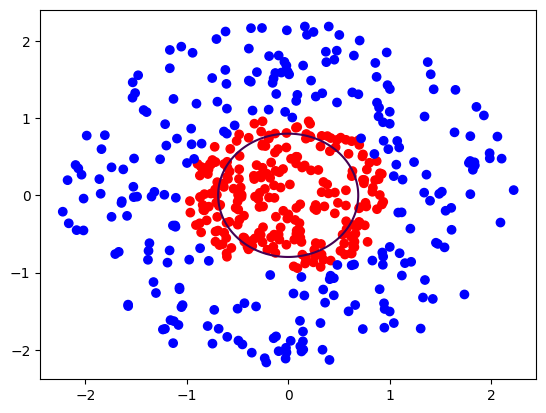

In [167]:
from sklearn.metrics import accuracy_score

label = Z.copy()
label[label == 'r'] = color['r']
label[label == 'b'] = color['b']
label = label.astype(float)


def sigmoid(x, theta):
    return 1 / (1 + numpy.exp(-numpy.dot(x, theta)))


def cost_function(theta, X, y):
    m = X.shape[0]
    h = sigmoid(X, theta)
    loss = (-1 / m) * numpy.sum(y * numpy.log(h) + (1 - y) * numpy.log(1 - h))
    return loss


def gradient_descent(theta, X, y, learning_rate, iterations):
    m = X.shape[0]
    for _ in range(iterations):
        h = sigmoid(X, theta)
        error = h - y
        delta_theta = (1 / m) * numpy.dot(X.T, error)
        theta -= learning_rate * delta_theta
    return theta


theta = numpy.random.rand(3)

learning_rate = 0.01
num_iterations = 1000

data = numpy.array([numpy.full(shape=500, fill_value=1, dtype=int), data[0], data[1]]).transpose()

theta = gradient_descent(theta, data, label, learning_rate, num_iterations)
print(f'Theta: {theta}')

y_pred = numpy.round(sigmoid(data, theta))

accuracy = accuracy_score(label, y_pred)
print(f'Accuracy: {accuracy}')

plt.scatter(data.transpose()[1], data.transpose()[2], color=Z)

x = numpy.linspace(-2.0, 2.0, 1000)
y = numpy.linspace(-2.0, 2.0, 1000)
X, Y = numpy.meshgrid(x, y)
F = (theta[1] * (X ** 2)) + (theta[2] * (Y ** 2)) - theta[0]
plt.contour(X, Y, F, [0])
plt.show()